In [7]:
from src import efficientNet
from src import pre_process
from PIL import Image
import pandas as pd
import numpy as np
Image.MAX_IMAGE_PIXELS = 3000000000 

train1 = pd.read_csv("../Final-IRONHACK-Project/data/train1.csv")
train_x, valid_x, train_y, valid_y = pre_process.train_valid_split(train1)

train_generator, validation_generator = pre_process.image_generator_for_B0()

Found 14 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [8]:
efficient_model = efficientNet.EfficientNet()

architecture = efficient_model.efficient_model()
# architecture.summary()

compB0 = efficient_model.compile_model()

In [9]:
efficient_model.model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['input_3[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 stem_conv_pad (ZeroPadding  (None, 225, 225, 3)          0         ['normalization_2[0

In [10]:
hist = efficient_model.train(train_generator, validation_generator, epochs = 5)

3/3 [==============================] - 219s 94s/step - loss: 0.7445 - accuracy: 0.3571 - val_loss: 0.6937 - val_accuracy: 0.5000


In [11]:
efficient_model.get_weights()

1/1 [==============================] - 1s 1s/step


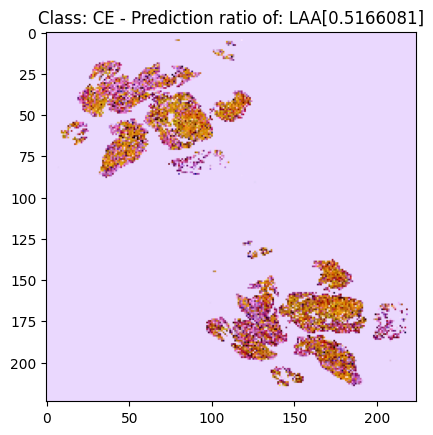

In [12]:
class_names = ["CE", "LAA"]
efficient_model.predict_efficientNet(validation_generator,class_names)

`Predict on new images:`

In [13]:
efficient_model = efficientNet.EfficientNet()
efficient_model.load_weights('data/Efficient_weights.npy')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'data/Efficient_weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
new_images_folder_dense = 'D:/bootcamp/test'
dense_generator = efficient_model.load_and_preprocess_images('efficientnet', new_images_folder_dense)

In [ ]:
predictions_efficient = efficient_model.predict(dense_generator)

In [ ]:
efficient_predicted_classes = np.argmax(predictions_efficient, axis=1)
print("EfficientNet Predictions:", efficient_predicted_classes)